In [232]:
"""Imports"""
import glob
import numpy
import os
import json

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, activations
from IPython.display import Markdown, display
from PIL import Image

In [233]:
"""Paths and constants"""
DATASET_PATH        = "dataset"
TEST_CSV_PATH       = os.path.join(DATASET_PATH, "test.csv")
TRAIN_CSV_PATH      = os.path.join(DATASET_PATH, "train.csv")
VALIDATION_CSV_PATH = os.path.join(DATASET_PATH, "validation.csv")
LABEL_MAP_PATH      = os.path.join(DATASET_PATH, "label_map.json")

with open(LABEL_MAP_PATH) as json_file:
    LABEL_MAP = json.load(json_file)

In [114]:
# """ Version 1.15.5 of tensorflow needed in order to run training on AMD Radeon GPU"""
# tf.__version__
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [234]:
""" Helper printing functions HTML and CSS"""

def print_title(string):
    string = "<div style='text-align: center;'>" + \
    "<span style='color:{}; font-size:{}; text-align:{}'>{}</span>".format("white", "24px", "center", string) + \
    "</div>"

    display(Markdown("**" + string + "**"))

    
def print_subtitle(string):
    string = "<span style='color:{}; font-size:{}'>{}</span>".format("white", "18px", string)
    white_spaces = " " * 10
    display(Markdown("**" + string + "**"))
    
    
def print_variable(string):
    string = "<span style='color:{}'>{}</span>".format("yellow", string)
    display(Markdown("**" + string + "**"))

    
def print_border():
    border = "-----------------------------------------------------------" * 3
    borderstr = "<span style='color:{}'>**{}**</span>".format("white", border)
    display(Markdown("**" + borderstr + "**"))
    
    
def print_dict(dict_to_print, spaces = ""):
    for key, value in dict_to_print.items():
        if type(value) is dict:
            spaces = spaces + " "
            print_dict(value)
        else:
            print(f"{spaces}{key} : {value}")

In [235]:
""" Prepare data functions """

def prepare_data():
    """
    Funtion to read .csv data files into pandas data frames.
    returns: dict with test, train and validation data frames
    """
    return {
        "test_data_frame" : pd.read_csv(TEST_CSV_PATH).drop("Unnamed: 0", axis=1).drop("ClassName", axis=1),
        "train_data_frame": pd.read_csv(TRAIN_CSV_PATH).drop("Unnamed: 0", axis=1).drop("ClassName", axis=1),
        "val_data_frame"  : pd.read_csv(VALIDATION_CSV_PATH).drop("Unnamed: 0", axis=1).drop("ClassName", axis=1),
    }


def display_prepared_data(data_dict):
    for key, data_frame in data_dict.items():
        print_variable(key)
        display(data_frame.head(5))

In [261]:
""" Analyze data functions """

def analyze_data(data_dict):
    print_variable("LABEL_MAP:")
    print_dict(LABEL_MAP)
    
    print_subtitle("2.1. Data distibution ")
    
    data_distribution = {
        "test_data_frame" : {key : 0 for key, _ in LABEL_MAP.items()},
        "train_data_frame": {key : 0 for key, _ in LABEL_MAP.items()},
        "val_data_frame"  : {key : 0 for key, _ in LABEL_MAP.items()}
    }
    
    for key, value_dict in data_distribution.items():
        for sub_key, sub_value in value_dict.items():
            details = data_dict[key].apply(lambda x : True if x['Label'] == 1 else False, axis = 1)
            value_dict[sub_key] = len(details[details == True].index)
        plot_data(data_distribution, key)

    
    #details = data_dict["test_data_frame"].apply(lambda x : True if x['Label'] == 1 else False, axis = 1)
        
def plot_data(data_distribution, key):
    df = pd.
    new_colors = ["red"]
    plt.bar(x, y, color=new_colors)
    plt.ylabel('some numbers')
    plt.show()

In [259]:
def main():
    # 1. Prepare test, train and validation data. Display the results
    print_title("1. Prepare test, train and validation data")
    data_dict = prepare_data()
    display_prepared_data(data_dict)
    print_border()
    
    # 2. Analyze test, tran and validation data
    print_title("2. Analyze test, train and validation data")
    analyze_data(data_dict)

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>1. Prepare test, train and validation data</span></div>**

**<span style='color:yellow'>test_data_frame</span>**

,Filename,Label
0,AnnualCrop/AnnualCrop_1275.jpg,0
1,Residential/Residential_504.jpg,7
2,Pasture/Pasture_787.jpg,5
3,Residential/Residential_1575.jpg,7
4,Pasture/Pasture_473.jpg,5


**<span style='color:yellow'>train_data_frame</span>**

,Filename,Label
0,AnnualCrop/AnnualCrop_142.jpg,0
1,HerbaceousVegetation/HerbaceousVegetation_2835...,2
2,PermanentCrop/PermanentCrop_1073.jpg,6
3,Industrial/Industrial_453.jpg,4
4,HerbaceousVegetation/HerbaceousVegetation_1810...,2


**<span style='color:yellow'>val_data_frame</span>**

,Filename,Label
0,Pasture/Pasture_1481.jpg,5
1,Forest/Forest_2638.jpg,1
2,Highway/Highway_875.jpg,3
3,River/River_434.jpg,8
4,SeaLake/SeaLake_2930.jpg,9


**<span style='color:white'>**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</span>**

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>2. Analyze test, train and validation data</span></div>**

**<span style='color:yellow'>LABEL_MAP:</span>**

AnnualCrop : 0
Forest : 1
HerbaceousVegetation : 2
Highway : 3
Industrial : 4
Pasture : 5
PermanentCrop : 6
Residential : 7
River : 8
SeaLake : 9


**<span style='color:white; font-size:18px'>2.1. Data distibution </span>**

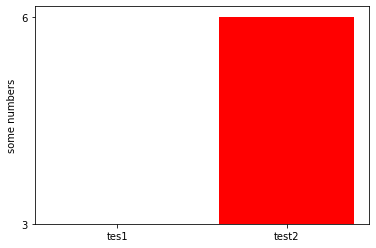

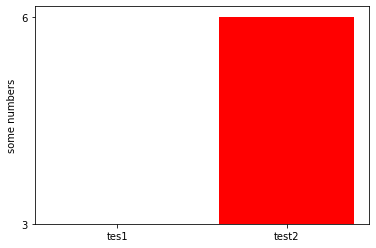

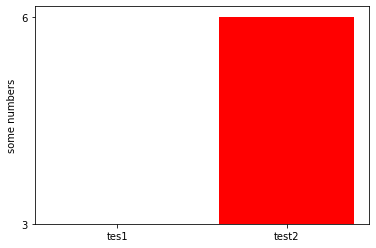

In [262]:
if __name__ == "__main__" :
        main()